Lab 4-Image Segmentation


In [2]:
!pip install scikit-image opencv-python scikit-learn matplotlib


DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\lib\site-packages\bs4-0.0.2-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\lib\site-packages\lxml-5.3.0-py3.13-win-amd64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\lib\site-packages\narwhals-1.19.0-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\l

Function 1: Snakes Algorithm (Active Contour)


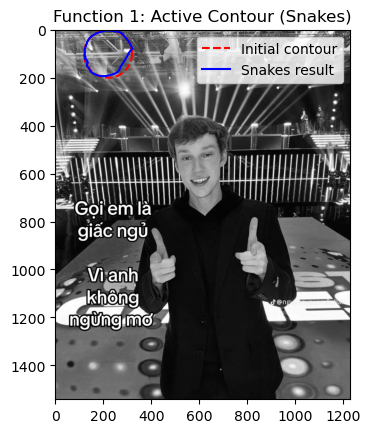

In [ ]:
from skimage import io, color
from skimage.filters import sobel
from skimage.segmentation import active_contour
import numpy as np
import matplotlib.pyplot as plt

image = io.imread(
    r'E:\MSE\HomeWork\Ky 2\IVP501\Test\IMG\6a92c8df69e5dcbb85f43.jpg')
gray = color.rgb2gray(image)
s = np.linspace(0, 2*np.pi, 400)
x = 220 + 100*np.cos(s)
y = 100 + 100*np.sin(s)
init = np.array([x, y]).T

snake = active_contour(sobel(gray), init, alpha=0.015, beta=10, gamma=0.001)

plt.imshow(gray, cmap='gray')
plt.plot(init[:, 0], init[:, 1], '--r', label='Initial contour')
plt.plot(snake[:, 0], snake[:, 1], '-b', label='Snakes result')
plt.legend()
plt.title("Function 1: Active Contour (Snakes)")
plt.show()


Function 2: Watershed


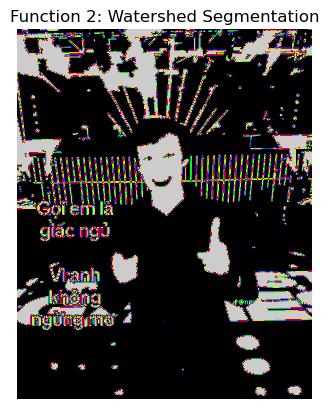

In [ ]:
from skimage.segmentation import watershed
from scipy import ndimage as ndi

elevation_map = sobel(gray)
markers = np.zeros_like(gray, dtype=np.int32)
markers[gray < 0.3] = 1
markers[gray > 0.7] = 2

segmentation_result = watershed(elevation_map, markers.astype(np.int32))


plt.imshow(segmentation_result, cmap='nipy_spectral')
plt.title("Function 2: Watershed Segmentation")
plt.axis('off')
plt.show()


Function 3: K-means


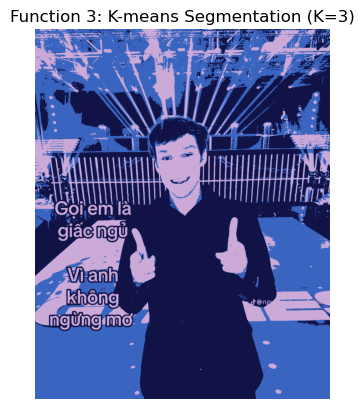

In [ ]:
from sklearn.cluster import KMeans

img_reshaped = image.reshape((-1, 3))
kmeans = KMeans(n_clusters=3, random_state=42).fit(img_reshaped)
segmented = kmeans.cluster_centers_[
    kmeans.labels_].reshape(image.shape).astype(np.uint8)

plt.imshow(segmented)
plt.title("Function 3: K-means Segmentation (K=3)")
plt.axis('off')
plt.show()


Function 4: Mean Shift


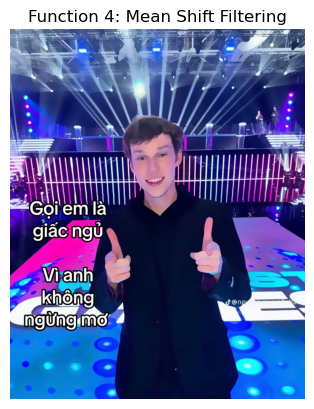

In [ ]:
import cv2

# Yêu cầu ảnh dưới dạng uint8 BGR
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
meanshift = cv2.pyrMeanShiftFiltering(image_bgr, sp=10, sr=30)
result = cv2.cvtColor(meanshift, cv2.COLOR_BGR2RGB)

plt.imshow(result)
plt.title("Function 4: Mean Shift Filtering")
plt.axis('off')
plt.show()
